<a href="https://colab.research.google.com/github/Pranay-Kumar-007/Neural-machine-translation-using-transformers/blob/main/Project_madlad_Finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers accelerate sentencepiece

In [ ]:
import torch
from torch.utils.data import random_split

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = 'jbochi/madlad400-3b-mt'
model = T5ForConditionalGeneration.from_pretrained(model_name, device_map="auto")
tokenizer = T5Tokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/11.8G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/830 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.43M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.6M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = []
with open("/content/drive/MyDrive/IITB.en-hi.en") as f2, open("/content/drive/MyDrive/IITB.en-hi.hi") as f1:
    for src, tgt in zip(f1, f2):
      data.append(
          {
              "translation":{
                  "inputs": src.strip(),
                  "targets": tgt.strip()
              }
          }
      )
print(f'total size of data is {len(data)}')

total size of data is 1659083


In [ ]:
def data_collator(features: list):
    labels = [f["translation"]["targets"] if "translation" in f else "" for f in features]
    inputs = [f["translation"]["inputs"] if "translation" in f else "" for f in features]

    model_inputs = tokenizer(inputs, max_length=32, padding='max_length', truncation=True, return_tensors="pt")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(labels, max_length=32, padding='max_length', truncation=True, return_tensors="pt")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
text = "<2en> में छोटा बच्चा हूँ"
input_ids = tokenizer(text, return_tensors="pt").input_ids.to(model.device)
outputs = model.generate(input_ids=input_ids)

tokenizer.decode(outputs[0], skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"I'm a little kid."

In [ ]:
import random
random.seed(69)

In [ ]:
data_test = []
for i in range(100):
  data_test.append(data[random.randint(1695,10000)])

In [ ]:
len(data_test)

100

In [ ]:
def data_collector(features: list):
    labels = [f["translation"]["targets"] if "translation" in f else "" for f in features]
    inputs = [f["translation"]["inputs"] if "translation" in f else "" for f in features]
    return inputs, labels

In [ ]:
hindi_test,english_test = data_collector(data_test)

In [ ]:
english_test[0]

'Place cards on to the Tableau to form poker hands'

In [ ]:
english_list=[]
for i in data:
  english_list.append(i['translation']['targets'])

In [ ]:
graph_list=[]
english_graph_list=['Co _ mment',
 'Gaps',
 'Italic',
 'Deal another round',
 '_ Accessible',
 'Wins:',
 'No description',
 'Easthaven',
 'Saving',
 'Available new pluginviews',
 'Remove the kings',
 'You are searching for a king.',
 'Seahaven',
 'Thirteen',
 'Treize',
 'Stock left: ~ a',
 'Plugins']

In [ ]:
for i in english_graph_list:
  graph_list.append(english_list.index(i))

In [ ]:
hindi_list=[]
for i in data:
  hindi_list.append(i['translation']['inputs'])

In [ ]:
hindi_graph_list=[]
for i in range(len(graph_list)):
  hindi_graph_list.append(hindi_list[graph_list[i]])

In [ ]:
hindi_graph_list_copy=hindi_graph_list
hindi_graph_list_copy[0]="टिप्पणी (_ m)"

In [ ]:
hindi_graph_list

['टिप्पणी (_ m)',
 'गैप',
 'इटालिक',
 'एक दौर और चलें',
 'पहुंचनीय',
 'जीताः',
 'कोई विवरण नहीं',
 'ईस्टहैवन',
 'सहेज रहे हैं',
 'नई pluginviews उपलब्ध है',
 'बादशाह मिटाएँ',
 'एक बादशाह को आप ढूंढ रहे हैं.',
 'सीहैवन',
 'तेरह',
 'ट्रेज',
 'बचा मालः ~ a',
 'प्लगइन्स']

In [ ]:
for i in range(len(hindi_graph_list)):
  hindi_graph_list[i] = "<2en> "+ hindi_graph_list[i]
encoded_graph_list = []
for i in hindi_graph_list:
  encoded_graph_list.append(tokenizer(i,return_tensors="pt").input_ids.to(model.device))
decoded_graph_list = []
for i in range(len(encoded_graph_list)):
  generated_tokens = model.generate(input_ids=encoded_graph_list[i])
  decoded_graph_list.append(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))

In [ ]:
for i in range(len(hindi_test)):
  hindi_test[i] = "<2en> "+ hindi_test[i]

In [ ]:
hindi_test[0]

'<2en> पोकर हाथ तैयार करने हेतु ताश के पत्तों को जमाएँ'

In [ ]:
encoded_list = []
for i in hindi_test:
  encoded_list.append(tokenizer(i,return_tensors="pt").input_ids.to(model.device))

In [ ]:
decoded_list = []
for i in range(len(encoded_list)):
  generated_tokens = model.generate(input_ids=encoded_list[i])
  decoded_list.append(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))

In [ ]:
decoded_list

[['Arrange cards to form poker hands'],
 ['jack of spades'],
 ['Move waste to reserve slot'],
 ['Remove the ten of hearts.'],
 ['Files'],
 ['Select File'],
 ['Version Control System Plugin'],
 ['Breakpoints'],
 ['Close All'],
 ['Current Selection'],
 ['#-#-#-#-#-#file-roller. gnome-'],
 ['Add _Macro...'],
 ['an empty tableau slot'],
 ['Installed Plugins'],
 ['License:'],
 ['Move ~a onto the six of diamonds.'],
 ['Patch Plugin'],
 ['#-#-#-#-#-#gedit. gnome-2-'],
 ['_Undo Move'],
 ['Start a new game'],
 ['to an empty tableau slot'],
 ['Sans'],
 ['Place the four of clubs next to the three of clubs.'],
 ['Text to render'],
 ['Compatibility is key'],
 ['Move a card from the reserve to the empty slot'],
 ["I think I'll have to scratch my back right away..."],
 ['Thai'],
 ['Remove the ten of clubs.'],
 ['Romanian'],
 ['Bold'],
 ['_Fullscreen'],
 ['Move ~a onto the eight of spades.'],
 ['three of diamonds'],
 ['to an empty tableau slot'],
 ['You are looking for a king.'],
 ['Progressive Round'

In [ ]:
english_test[0]

'Place cards on to the Tableau to form poker hands'

In [ ]:
from nltk.translate import chrf_score

In [ ]:
res = chrf_score.sentence_chrf(english_test[0].lower().split(), decoded_list[0][0].lower().split())
print(res)

0.4778027785775933


In [ ]:
def check_chrf(reference,predictions):
  score = chrf_score.sentence_chrf(reference, predictions,min_len=1,max_len=3)
  return score

In [ ]:
chrfscores = []
for i in range(len(decoded_list)):
  print(check_chrf(english_test[i].lower().split(),decoded_list[i][0].lower().split()))
  chrfscores.append(check_chrf([english_test[i].lower()],decoded_list[i][0].lower()))

0.5541869535967848
1.0
0.5731476773267893
0.8480785296574771
0.3910160326625218
0.3276112720213002
0.9652163792890267
1.0
1.0
0.6778587232321581
0.16864323795016867
0.8393939393939395
0.7433223161628835
1.0
1.0
1.0
1.0
0.0918241464938504
1.0
1.0
0.7502200322139649
0.13605442176870755
1.0
0.603596984410938
0.43123697785587245
0.7702105701248768
0.3899659109030993
1.0
0.8154810276369909
0.5456349206349206
1.0
1.0
1.0
1.0
0.7502200322139649
0.7000862472785668
0.9432463679938379
0.7559419377811548
1.0
0.8852566198103956
1.0
0.9040742109114092
0.36923367144080216
0.628295376121463
0.31582491582491584
1.0
0.485575593533752
1.0
1.0
1.0
0.6510692306344037
1.0
0.07575757575757582
0.2083333333333334
0.9466208196454445
1.0
1.0
0.0680272108843538
1.0
0.16409266409266413
0.799073945933455
0.3124030667066661
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1e-16
1.0
0.7249973055561371
0.5276907719207447
0.6881060817300245
1.0
1.0
1.0
0.46234911668550877
0.7127698277952947
0.7579375040169755
0.4154834847904154

In [ ]:
graph_chrf=[]
for i in range(len(decoded_graph_list)):
  graph_chrf.append(check_chrf([english_graph_list[i].lower()],decoded_graph_list[i][0].lower()))

In [ ]:
graph_chrf

[0.7063960689325651,
 0.6617339103727488,
 1.0,
 1.0,
 0.9084661687486139,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9531024531024531,
 1.0,
 0.7000862472785668,
 1.0,
 1.0,
 0.18438697318007666,
 1.0,
 1.0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from pathlib import Path
from matplotlib.font_manager import FontProperties

# point to the font location with an absolute path
nirm = Path('/content/drive/MyDrive/Nirmala-UI.ttf')

# configure the Hindi font
hindi_font = FontProperties(fname=nirm)

In [ ]:
len(hindi_test[0])

53

<ipython-input-57-3e4b467d4b2f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(text, fontproperties=hindi_font)


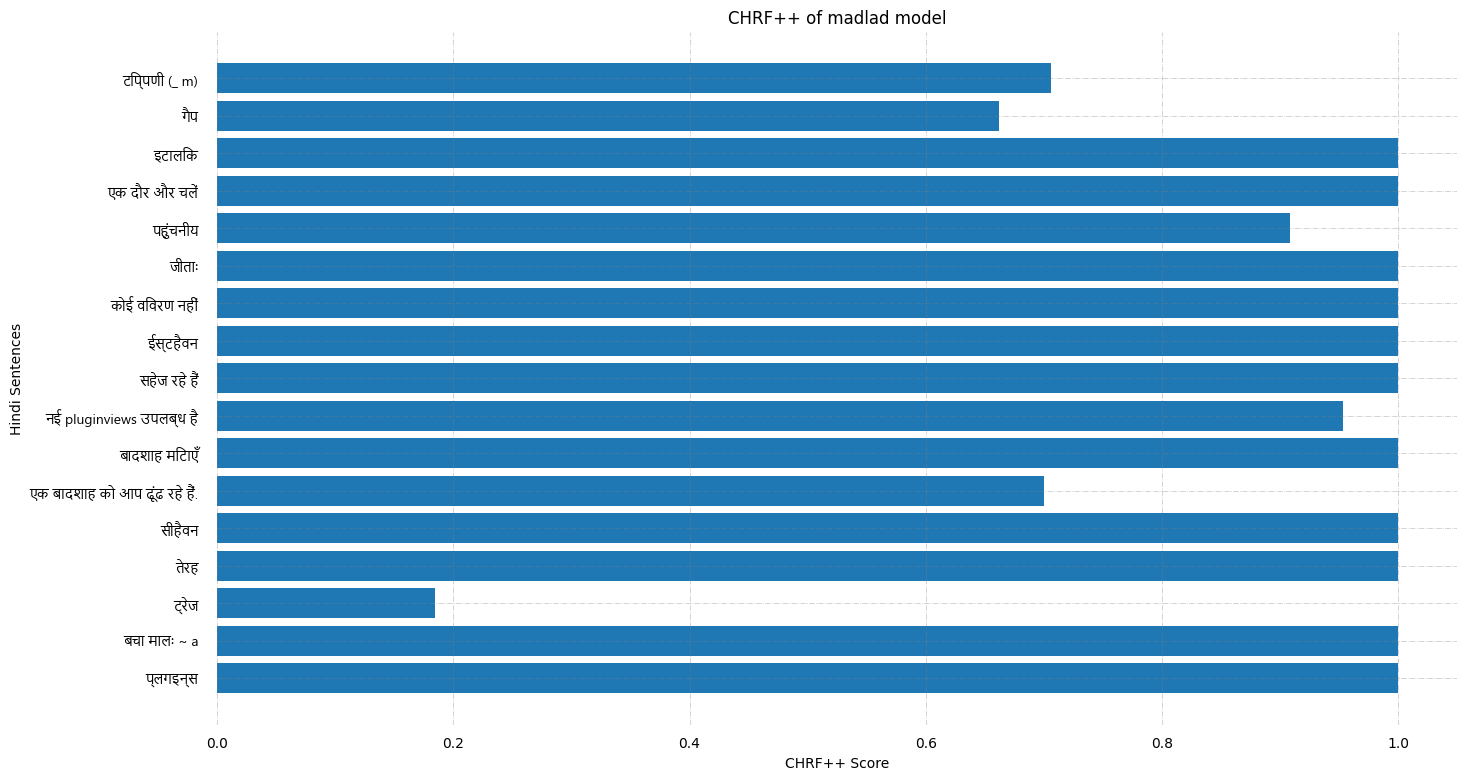

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(hindi_graph_list_copy, graph_chrf)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.6,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
             '''
plt.title('CHRF++ of madlad model')
plt.xlabel('CHRF++ Score')
plt.ylabel('Hindi Sentences')
plt.show()

In [ ]:
from statistics import mean

In [ ]:
mean(chrfscores)

0.7676113109638121

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Define your desired weights (example: higher weight for bi-grams)
weights = (0.25, 0.25, 0, 0)  # Weights for uni-gram, bi-gram, tri-gram, and 4-gram

# Reference and predicted texts (same as before)
reference = [['Give', 'your', 'application', 'an', 'accessibility', 'workout']]
predictions = ['Benefit', 'your', 'application', 'from', 'accessibility', 'exercises']

# Calculate BLEU score with weights
score = sentence_bleu([english_test[15].split()], decoded_list[15][0].split(),weights=weights)
print(score)

0.7536998328984836


In [ ]:
def check_bleu(reference,predictions):
  weights = (0.25, 0.25, 0, 0)
  score = sentence_bleu(reference, predictions, weights=weights)
  return score

In [ ]:
scores = []
for i in range(len(decoded_list)):
  print(check_bleu([english_test[i].lower()],decoded_list[i][0].lower()))
  scores.append(check_bleu([english_test[i].lower()],decoded_list[i][0].lower()))

0.5708745070398581
1.0
0.8343519768888821
0.9472158794310398
0.4960923395774537
0.28117355391392446
0.9333588643117228
1.0
1.0
0.8674370228188473
0.2753358028987337
0.8847028384505817
0.8676710546861114
1.0
1.0
0.9624817203144129
1.0
0.17173118638645238
0.8785822423787161
1.0
0.8186902147734563
7.998434422407446e-78
1.0
0.48954165955695317
0.7089602879922362
0.7873121827816278
0.6761234037828132
1.0
0.8898377097406743
0.7825422900366437
1.0
0.8893635185225456
0.9624817203144129
1.0
0.8186902147734563
0.8457315710156035
0.9428731438548749
0.8602400071497226
0.9624817203144129
0.77672372817166
1.0
0.694437054145595
0.4981423827508884
0.749634235443537
0.5900468726392808
1.0
0.4956879570310086
1.0
1.0
1.0
0.8423190162029556
1.0
6.432062707336974e-78
7.508645449069235e-78
0.9459594689067654
0.8282522410375708
1.0
6.725854833444237e-78
1.0
0.38827267775222324
0.825052966980536
0.45499414040480374
1.0
1.0
1.0
0.9352689140760907
0.9635752636155307
1.0
0
0.8785822423787161
0.8952558883806976
0

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
mean(scores)

0.7995204058512451

In [ ]:
graph_bleu=[]
for i in range(len(decoded_graph_list)):
  graph_bleu.append(check_bleu([english_graph_list[i].lower()],decoded_graph_list[i][0].lower()))

<ipython-input-46-50e71a2de70a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(text, fontproperties=hindi_font)


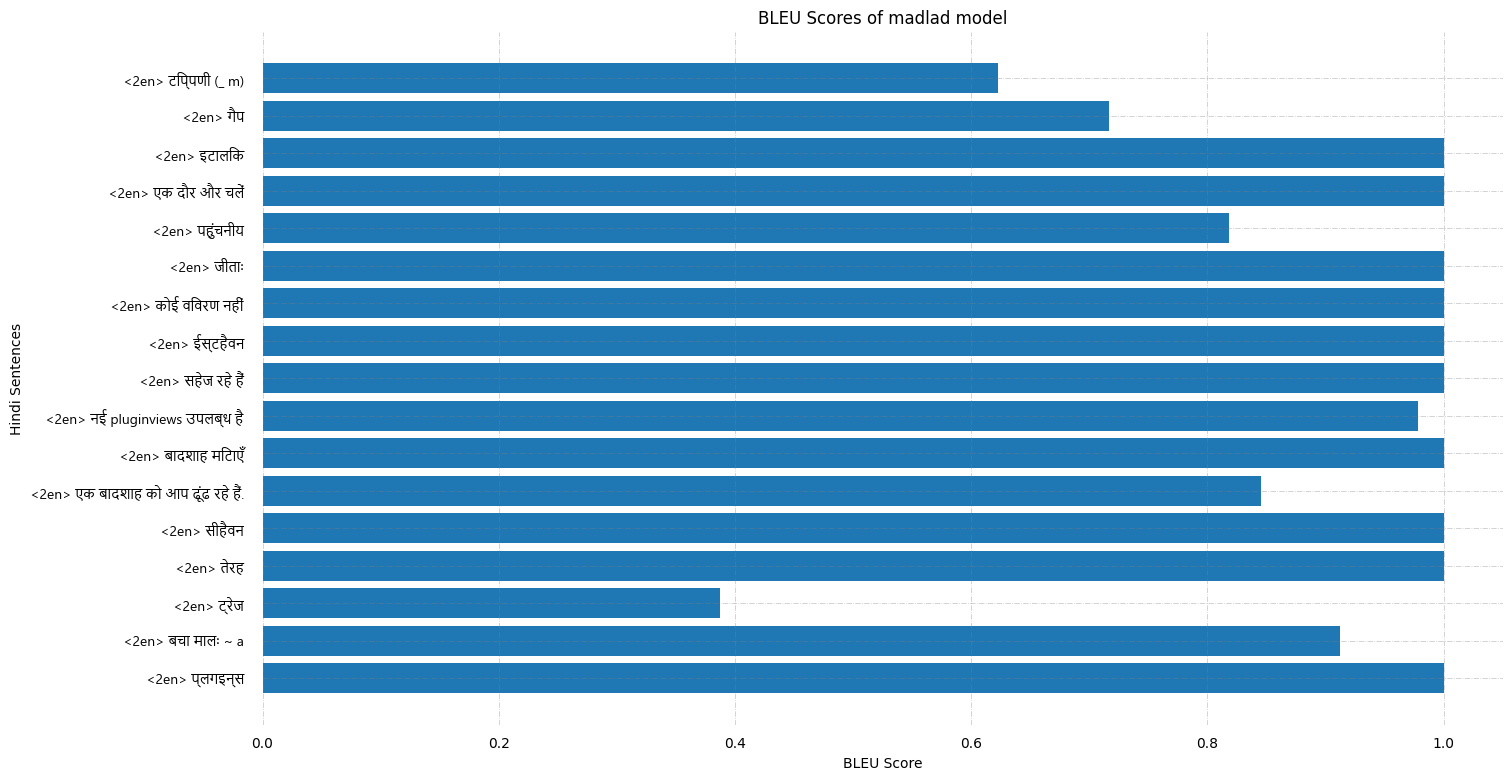

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(hindi_graph_list, graph_bleu)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.6,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
'''
plt.title('BLEU Scores of madlad model')
plt.xlabel('BLEU Score')
plt.ylabel('Hindi Sentences')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

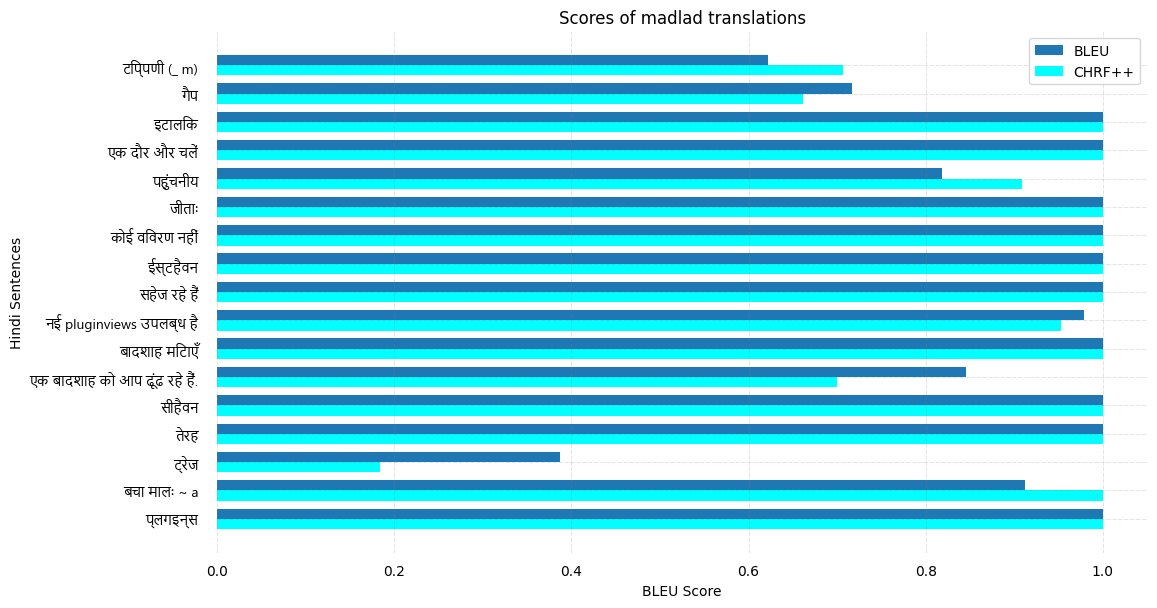

In [ ]:
fig, ax = plt.subplots(figsize =(12, 6.77))
y=np.arange(17)
width=0.36
ax.barh(y-0.18, graph_bleu,width,label='BLEU')
ax.barh(y+0.18, graph_chrf,width,label='CHRF++',color='cyan')
plt.yticks(y, hindi_graph_list_copy)
ax.legend(fontsize=10)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.4,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
'''
plt.title('Scores of madlad translations')
plt.xlabel('BLEU Score')
plt.ylabel('Hindi Sentences')
plt.show()